In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scst
import scipy.optimize as scop
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Редактируем датасет

In [ ]:
png = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pinguins.csv')
pgns = png.dropna()

#men is 0, woman is 1
pgns['sex'] = pgns['sex'].replace({'male': 0 , 'female': 1})

pgns.rename(columns = {'bill_length_mm': 'dlina_kluva',
                        'bill_depth_mm':'glubina_kluva',
                        'flipper_length_mm':'dlina_krila',}, inplace=True)

gentoo = pgns[pgns['island']=='Biscoe']
gentoo = pgns[pgns['species']=='Gentoo']

print(gentoo)

    species  island  dlina_kluva  glubina_kluva  dlina_krila  body_mass_g  \
152  Gentoo  Biscoe         46.1           13.2        211.0       4500.0   
153  Gentoo  Biscoe         50.0           16.3        230.0       5700.0   
154  Gentoo  Biscoe         48.7           14.1        210.0       4450.0   
155  Gentoo  Biscoe         50.0           15.2        218.0       5700.0   
156  Gentoo  Biscoe         47.6           14.5        215.0       5400.0   
..      ...     ...          ...            ...          ...          ...   
270  Gentoo  Biscoe         47.2           13.7        214.0       4925.0   
272  Gentoo  Biscoe         46.8           14.3        215.0       4850.0   
273  Gentoo  Biscoe         50.4           15.7        222.0       5750.0   
274  Gentoo  Biscoe         45.2           14.8        212.0       5200.0   
275  Gentoo  Biscoe         49.9           16.1        213.0       5400.0   

     sex  year  
152    1  2007  
153    0  2007  
154    1  2007  
155    

<ipython-input-6-36b2ee682f4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pgns['sex'] = pgns['sex'].replace({'male': 0 , 'female': 1})
<ipython-input-6-36b2ee682f4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pgns.rename(columns = {'bill_length_mm': 'dlina_kluva',


In [ ]:
gentoo

,species,island,dlina_kluva,glubina_kluva,dlina_krila,body_mass_g,sex,year
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,1,2007
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,0,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,1,2007
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,0,2007
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,0,2007
...,...,...,...,...,...,...,...,...
270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1,2009


In [ ]:
gentoo.drop('species', axis= 1 , inplace= True )
gentoo.drop('island', axis=1, inplace=True )

<ipython-input-8-5f5edea745e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gentoo.drop('species', axis= 1 , inplace= True )
<ipython-input-8-5f5edea745e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gentoo.drop('island', axis=1, inplace=True )


In [ ]:
gento = gentoo.to_csv('gentoo.csv', index=False)

In [ ]:
gentoo = pd.read_csv('/content/gentoo.csv')
gentoo

,dlina_kluva,glubina_kluva,dlina_krila,body_mass_g,sex,year
0,46.1,13.2,211.0,4500.0,1,2007
1,50.0,16.3,230.0,5700.0,0,2007
2,48.7,14.1,210.0,4450.0,1,2007
3,50.0,15.2,218.0,5700.0,0,2007
4,47.6,14.5,215.0,5400.0,0,2007
...,...,...,...,...,...,...
114,47.2,13.7,214.0,4925.0,1,2009
115,46.8,14.3,215.0,4850.0,1,2009
116,50.4,15.7,222.0,5750.0,0,2009
117,45.2,14.8,212.0,5200.0,1,2009


# Этот документ можно свернуть, потому что тут работа с данными о мальчиках и девочках отдельно

In [ ]:
df = pd.read_csv('/content/penguins.csv')
male_peng = df[df['sex'] == 0]
female_peng = df[df['sex'] == 1]

print(male_peng)
print(female_peng)

male_peng.to_csv('male_peng.csv', index = False)
female_peng.to_csv('female_peng.csv', index = False)



FileNotFoundError: [Errno 2] No such file or directory: '/content/penguins.csv'

# Работа с файлом

In [ ]:
read = '/content/gentoo.csv'

<ipython-input-15-3d75cf8ff495>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='sex', y = 'body_mass_g' , data=gentoo , palette = 'pink')


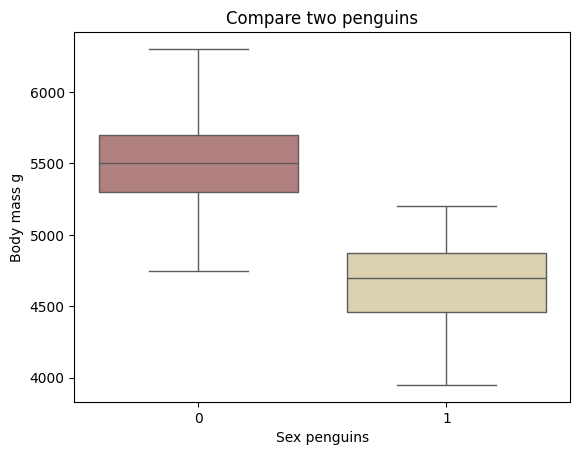

In [ ]:
# Построим график и заметим, что девочки весят меньше мальчиков
X = gentoo['sex']
Y = gentoo['body_mass_g']

sns.boxplot(x ='sex', y = 'body_mass_g' , data=gentoo , palette = 'pink')

plt.xlabel('Sex penguins')
plt.ylabel('Body mass g')
plt.title('Compare two penguins')
plt.show()

<ipython-input-16-40fe780a0c3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='dlina_krila', data=gentoo, palette="Paired")


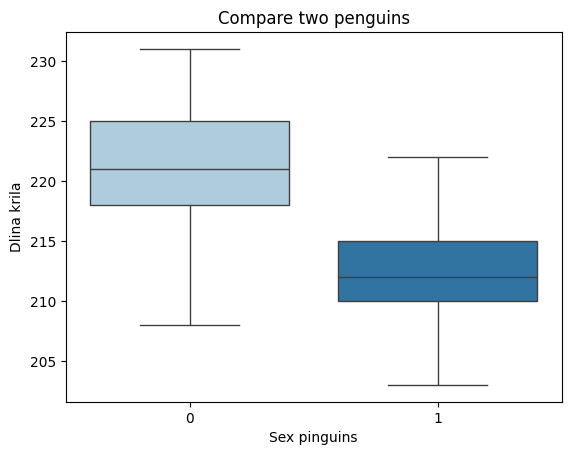

In [ ]:
x= gentoo['sex']
Y = gentoo['dlina_krila']

sns.boxplot(x='sex', y='dlina_krila', data=gentoo, palette="Paired")

plt.xlabel('Sex pinguins')
plt.ylabel('Dlina krila')
plt.title('Compare two penguins')
plt.show()

<ipython-input-17-f3d625beb765>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='glubina_kluva', data=gentoo, palette="Set1")


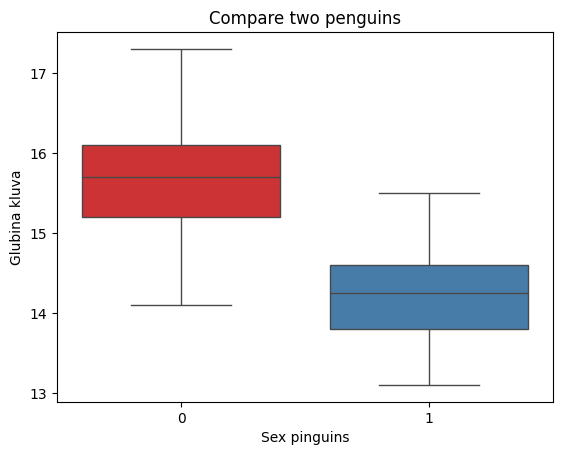

In [ ]:
x= gentoo['sex']
Y = gentoo['glubina_kluva']

sns.boxplot(x='sex', y='glubina_kluva', data=gentoo, palette="Set1")

plt.xlabel('Sex pinguins')
plt.ylabel('Glubina kluva')
plt.title('Compare two penguins')
plt.show()

<ipython-input-18-8797d93d4e09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='dlina_kluva', data=gentoo, palette="Set2")


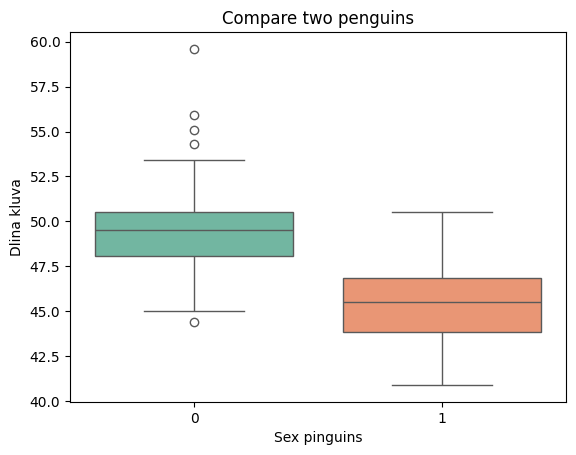

In [ ]:
x= gentoo['sex']
Y = gentoo['dlina_kluva']

sns.boxplot(x='sex', y='dlina_kluva', data=gentoo, palette="Set2")

plt.xlabel('Sex pinguins')
plt.ylabel('Dlina kluva')
plt.title('Compare two penguins')
plt.show()

### С помощью теста Шапиро-Уилка проверим генеральноую совокупность на нормальность распределения

In [ ]:
with open(read, 'r' ) as INPUT:
  header = INPUT.readline().strip().split(',')
  data = [np.array([], dtype=float) for i in header]
  for Rows in INPUT:
    Rows = Rows.strip().split(',')
    for i in range(len(Rows)):
      data[i] = np.append(data[i], float(Rows[i]))

In [ ]:
def Normality_checker(List_of_values, alpha=0.05):
    n = len(List_of_values)
    Checker_vector = []
    for i in range(n):
        if 1-scst.shapiro(List_of_values[1]).statistic < alpha:
            Checker_vector.append(True)
        else:
            Checker_vector.append(False)
    return Checker_vector

In [ ]:
print(header)
print(Normality_checker(data, alpha=0.13))

['dlina_kluva', 'glubina_kluva', 'dlina_krila', 'body_mass_g', 'sex', 'year']
[True, True, True, True, True, True]


In [ ]:
print(header[:4])
print(np.corrcoef(data[:4]))

['dlina_kluva', 'glubina_kluva', 'dlina_krila', 'body_mass_g']
[[1.         0.65402331 0.66420524 0.66673022]
 [0.65402331 1.         0.71064219 0.7229672 ]
 [0.66420524 0.71064219 1.         0.71130526]
 [0.66673022 0.7229672  0.71130526 1.        ]]


### Построии тепловую карту, чтобы определить какие данные коррелируют между собой

<Axes: >

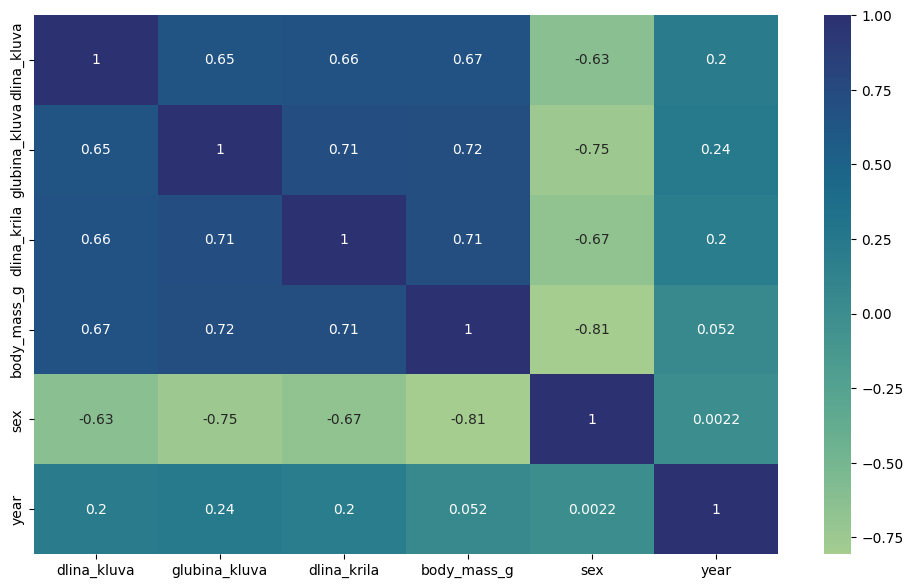

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(gentoo.corr(), annot=True, cmap='crest')

### Гистограмма распределения

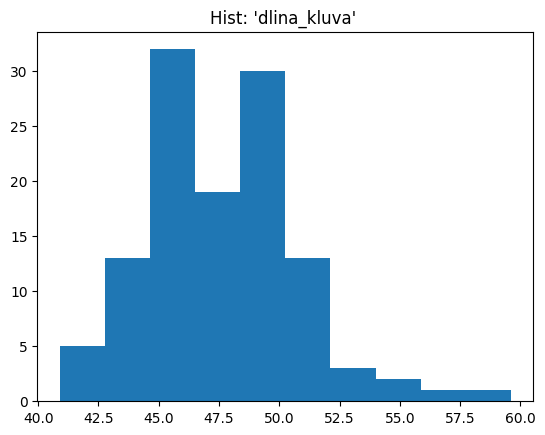

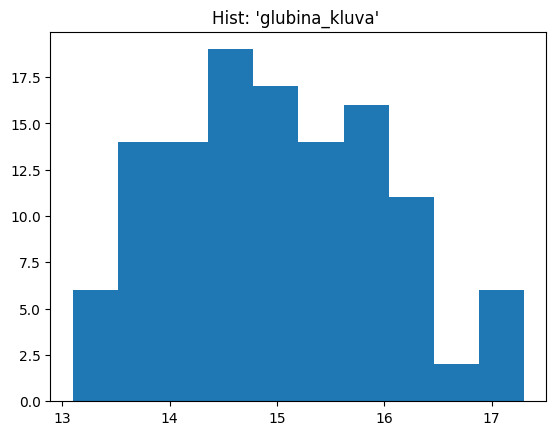

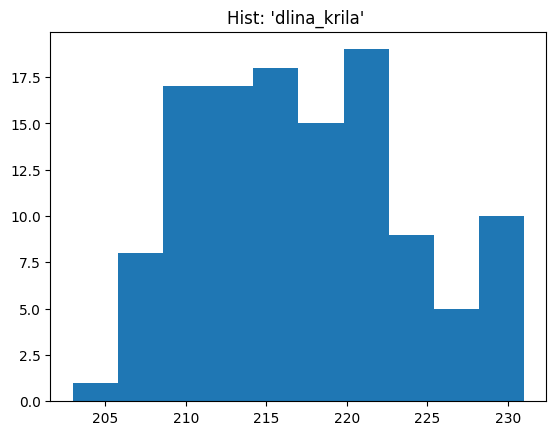

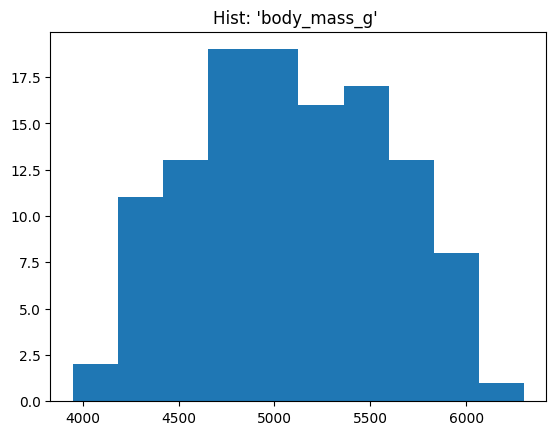

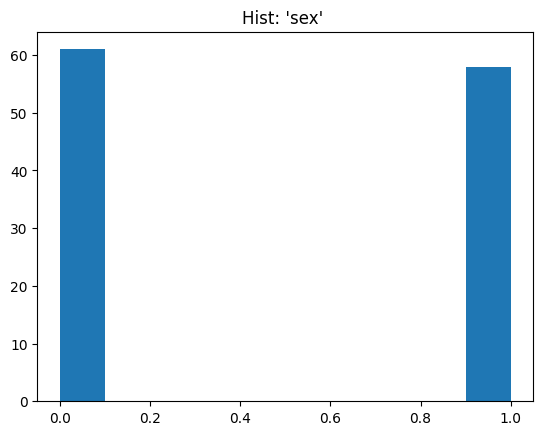

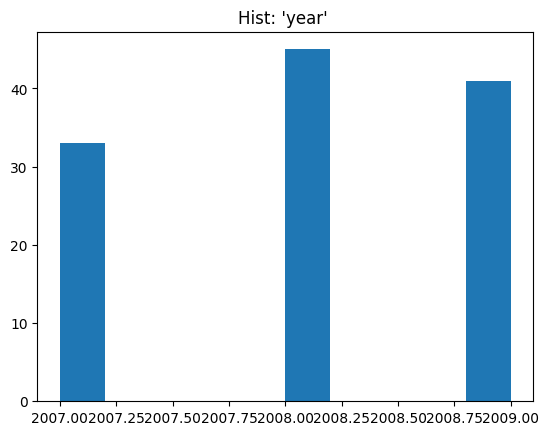

In [ ]:
#Гистограмма распределений
for i in range(len(header)):
  if i == 1 and i == 2:
    plt.title('Hist' + " ln('" + header[i]+ "') " )
  else:
    plt.title("Hist:" + " '" + header[i]+ "' ")
  plt.hist(data[i])
  plt.show()

In [ ]:
#Вычисляет обычный коеффициент детерминации
def Determination_coef(Y_vector_exp, Y_vector_fit):
  Mean_np = lambda Y: np.sum(Y)/len(Y)
  Variance_np = lambda Y, y_mean: np.sum(np.power(Y - np.ones(len(Y))*y_mean, 2))
  y_mean_exp = Mean_np(Y_vector_exp)
  return Variance_np(Y_vector_fit, y_mean_exp)/ Variance_np(Y_vector_exp, y_mean_exp)

In [ ]:
#Вычисляет скорректированный коэффициент детерминации для регрессии
def Determination_coef_adj(Y_vector_exp, Y_vector_fit, n, k):
  return 1-(1-Determination_coef(Y_vector_exp, Y_vector_fit)*(n-1)/(n-k-1))

In [ ]:
#Средняя ошбика аппроксимации(показывает среднее отклонение расчетных значений от фактических)
def Mean_error_of_approximation(Y_vector_exp, Y_vector_fitted):
  n = len(Y_vector_exp)
  if n == len(Y_vector_fitted):
    return np.sum(np.fabs((Y_vector_exp - Y_vector_fitted)/Y_vector_exp))/n
  else:
    print("Mean_error_of_approximation(a1, a2) must have len a1= len a2")


In [ ]:
def F_test_on_significance(Y_vector_exp, Y_vector_fit, pars_len= 3,alpha = 0.05):
  n = len(Y_vector_exp) if len(Y_vector_exp) == len(Y_vector_fit) else 0
  try :
    y_mean_exp = np.sum(Y_vector_exp)/n
  except ZeroDivisionError:
    raise("* 'F_test_on_significance' must has a1 == a2 *")
    MSE = np.sum( np.power(Y_vector_exp - Y_vector_fit, 2) ) / (n - pars_len - 1)
    MSR = np.sum( np.power(Y_vector_fit - np.ones(n) * y_mean_exp, 2) ) / pars_len
    F_value = MSR / MSE
    F_value_critical = scst.f.ppf(q = 1 - alpha, dfn= pars_len, dfd= n - pars_len - 1)
    if F_value > F_value_critical :
        return str(round(F_value, 2)) + " " + str(round(F_value_critical, 2)) + " H0 - sucsess!"
    else:
        return str(round(F_value, 2)) + " " + str(round(F_value_critical, 2)) + " H1 - sucsess!"

In [ ]:
def Mean_square_func(V_variavle, V_fixed):
    N = len(V_variavle) if len(V_variavle) == len(V_fixed) else 0
    try:
        S_square = np.sum(np.power(np.abs(V_variavle- V_fixed),2)) / (N-1)
    except ZeroDivisionError:
        if N == "0":
            raise("Mean_square_func - must have arg with equal lens!")
        else:
            raise("Mean_square_func - arg must be great then 1!")
    else:
        return S_square

In [ ]:
def Linear_regration_Multi_dimensional(DATA, Pars):
    n_dim = len(DATA)
    n_objects = len(DATA[0])
    if len(Pars) == n_dim + 1:
        Y = np.ones(n_objects)*Pars[0]
        for i in range(n_dim):
            Y = Y + Pars[i+1] * DATA[i]
        return Y # X_values is a numpy object; numpy vectors is returned
    else:
        raise("* With 'Pars' troubles! *")

Target_func = lambda Pars: Mean_square_func(Linear_regration_Multi_dimensional([data[1]], Pars), data[2])
# len(Pars_init) == n_dim + 1 ! (2)
Pars_init = [1, 1]
res = scop.minimize(Target_func, Pars_init, method='SLSQP', options={'eps':1e-5, 'ftol':1e-8, 'disp': True, 'maxiter':100})
print(res)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 21.466575543983176
            Iterations: 6
            Function evaluations: 21
            Gradient evaluations: 6
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 21.466575543983176
       x: [ 1.461e+02  4.745e+00]
     nit: 6
     jac: [ 1.670e-08 -1.066e-09]
    nfev: 21
    njev: 6


In [ ]:
def Mean_square_func(V_variable, V_fixed):
    N = len(V_variable) if len(V_variable) == len(V_fixed) else 0
    try:
        S_square = np.sum( np.power(np.abs(V_variable - V_fixed),2)) / (N - 1)
    except ZeroDivisionError:
        if N == 0:
            raise("Mean_square_func - must have arg with equal lens!")
        else:
            raise("Mean_square_func - arg must be great then 1!")
    else:
        return S_square


Target_func = lambda Pars: Mean_square_func(Linear_regration_Multi_dimensional([data[2], data[3], data[4]], Pars), data[-1])
# len(Pars_init) == n_dim + 1 ! (3)
Pars_init = [res.x[0], res.x[1], 1, 1]
res2 = scop.minimize(Target_func, Pars_init, method='SLSQP', options={'eps':1e-5, 'ftol':1e-8, 'disp': True, 'maxiter':90})
print("Res2: ", res2)

Y_model_2 = Linear_regration_Multi_dimensional([data[2], data[3], data[4]], res2.x)
print("A_mean : ", Mean_error_of_approximation(data[-1], Y_model_2))
print("R2 adj : ", Determination_coef_adj(data[-1], Y_model_2, len(Y_model_2), len(res2.x)+1))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7910622695119444
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Res2:   message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.7910622695119444
       x: [ 2.001e+03  7.503e-02 -1.732e-03 -7.280e-01]
     nit: 11
     jac: [-1.905e-07 -1.139e-07  7.668e-08  4.124e-08]
    nfev: 66
    njev: 11
A_mean :  0.00036997989953393225
R2 adj :  0.4244815024365105


In [ ]:
# # Выполним двусторонний ANOVA
# import statsmodel.api as sm
# from starsmodels.formula.api import ols



### Проведем анализ взаимосвязи между длиной крыла и полом пингвина

---




In [ ]:
#Строим линейную регрессию для массы тела и длины крыла
X = gentoo['body_mass_g'].values.reshape(-1,1)
y = gentoo['dlina_krila'].values
model = LinearRegression()
model.fit(X, y)

predict_y = model.predict(X)

print('Предсказанный y: ', predict_y  )

Предсказанный y:  [211.70138446 222.91049509 211.23433818 222.91049509 220.10821743
 212.16843073 214.50366211 218.24003233 210.7672919  217.77298605
 213.10252329 221.50935626 213.10252329 224.31163392 208.8991068
 224.31163392 208.43206052 228.51505041 214.50366211 219.64117115
 222.91049509 216.37184722 210.7672919  216.8388935  216.37184722
 217.30593977 222.44344881 212.63547701 221.50935626 218.7070786
 213.56956956 216.8388935  226.17981902 217.77298605 220.10821743
 215.90480094 218.7070786  210.30024563 219.64117115 206.56387542
 222.91049509 209.83319935 214.03661584 221.50935626 215.43775467
 208.8991068  220.10821743 217.30593977 219.17412488 214.97070839
 219.17412488 210.7672919  216.37184722 215.43775467 216.8388935
 209.83319935 216.37184722 211.23433818 221.50935626 208.8991068
 219.17412488 210.7672919  222.44344881 213.56956956 222.91049509
 223.84458764 213.56956956 221.50935626 214.03661584 216.37184722
 217.30593977 218.24003233 213.56956956 223.84458764 212.63547

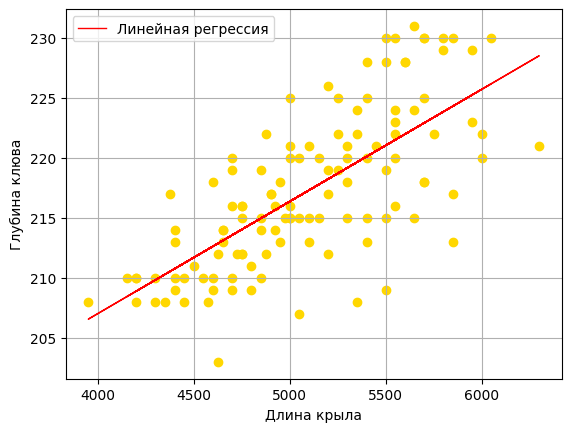

In [ ]:
plt.scatter(X, y, color='gold')
plt.plot(X, predict_y, color = 'red', label = 'Линейная регрессия',linewidth=1, markersize=10)
plt.legend()
plt.grid()
plt.xlabel('Длина крыла')
plt.ylabel('Глубина клюва')
plt.show()

In [ ]:
# Рассчитаем множественную корреляцию
a = gentoo['body_mass_g']
b = gentoo['dlina_krila']

corr_coef = np.corrcoef(a,b)
mult_corr = corr_coef[-1: 1]
mult_corr = np.sqrt(np.prod(mult_corr**2))

print('Множественная корреляция: ', mult_corr)

Множественная корреляция:  1.0


In [ ]:
#Вычислим коэффициенты b1 и b0 для уравнения линейной регрессии:
x1 = gentoo['body_mass_g']
y1 = gentoo['dlina_krila']

mean_x = sum(x1)/len(x1)
mean_y = sum(y1)/len(y1)

covariance = sum((xi-mean_x)*(yi-mean_y) for xi, yi in zip(x1, y1))
variance = sum((xi - mean_x)**2 for xi in x1)

b1 = covariance / variance
b0 = mean_y - b1*mean_x

print('Коэффициент линейной регрессии: ')
print('b1 - наклон линии: ', b1)
print('b0 - интерсепт', b0)
print('Уравнение линейной регрессии: y = {:.2f} + {:.4f}*x1'.format(b0, b1))

#Обратная связь между зависимой переменной (y) и независимой переменной (x), увеличение x связано с уменьшением значения  y

Коэффициент линейной регрессии: 
b1 - наклон линии:  0.009340925526910201
b0 - интерсепт 169.66721958565057
Уравнение линейной регрессии: y = 169.67 + 0.0093*x1


In [ ]:
#Рассчитаем объясненную и необъясненную дисперсию
x2 = np.array(gentoo['body_mass_g'])
y2 = np.array(gentoo['dlina_krila'])

y_pred = b0 + b1*x1

y_mean = np.mean(y2)

#Объясненная дисперсия SSR(регресионный анализ)
SSR = np.sum((y_pred - y_mean)**2)

#Необъясненная дисперсия SSE(ошибка суммы квадратов)
SSE = np.sum((y2 - y_pred)**2)

sum_desp = int(SSR)+ int(SSE)

print('Объясненная дисперсия: ', SSR)
print('Необъясненная дисперсия: ', SSE )
print('Сумма: ', sum_desp)

Объясненная дисперсия:  4867205.448317983
Необъясненная дисперсия:  4871657.176679962
Сумма:  9738862


In [ ]:
#Коэффициент детерминации
r_2 = SSR / sum_desp
print('Коэффициент детерминации: ', r_2)

Коэффициент детерминации:  0.4304430075025573


In [ ]:
# Определим уровень значимости уровнения вручную
from scipy.stats import t # Student’s t continuous random variable.

group_body = np.array(gentoo['body_mass_g'])
group_dlina = np.array(gentoo['dlina_krila'])

mean_x = sum(group_body)/len(group_body)
mean_y = sum(group_dlina)/len(group_dlina)

#Рассчитаем дисперсию
var1 = np.var(group_body, ddof=1)
var2 = np.var(group_dlina, ddof=1)

# Стандартная ошибка

se = np.sqrt((var1/len(group_body))+(var2/len(group_dlina)))

# Рассчитаем t статистику
t_stat = (mean_x-mean_y)/se

# Степень свободы
n1 = len(group_body)
n2 = len(group_dlina)
df = (var1/n1 + var2/n2)**2 / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))

# Определите p значение
p_value = 2*(1-t.cdf(abs(t_stat), df))

print(f'P value: {p_value:.1f}')

if p_value <= 0.05:
  print('Есть значимая разница, нулевую гипотезу отвергаем')
else:
  print('Не отвергаем нулевую гипотезу, значимой разницы нету')



P value: 0.0000000000
Есть значимая разница, нулевую гипотезу отвергаем


In [ ]:
# Определим уровень значимости уровнения с помощью библиотеки scipy
from scipy import stats

t_stat, p_value = stats.ttest_ind(np.array(gentoo['body_mass_g']), np.array(gentoo['dlina_krila']))
print('T_stat: ' ,t_stat)
print('P_value: ',p_value)

alpha = 0.05
if p_value <= alpha:
  print('Есть значимая разница, нулевую гипотезу отвергаем')
else:
  print('Не отвергаем нулевую гипотезу, значимой разницы нету')


T_stat:  106.04210417809483
P_value:  4.424127517200833e-201
Есть значимая разница, нулевую гипотезу отвергаем


In [ ]:
#Оценка значимости уравнения в целом (F-критерий Фишера)
n = len(np.array(gentoo['dlina_krila']))
print('n: ', n)

k = 1


#Дисперсия на 1 степень свободы, факторная - msr
#Дисперсия на 1 степень свободы, остаточная - mse
msr = SSR/k
mse = SSE/(n-k-1)

F = msr/mse

if F > 3.86:
  print(f'F - критерий Фишера: {F}, модель значимая')
else:
  print(f'F - критерий Фишера: {F}, модель Не значимая')


n:  119
F - критерий Фишера: 97.64360287345745, модель значимая


In [ ]:
#Оценка значимости параметра (t-критерий Стьюдента)
#Для того, чтобы рассчитать t критерий нам понадобиться SSX(сумма квадратов отклонений среднего значения от X)
x1 = np.array(gentoo['dlina_krila'])
x1_mean = x1.mean()
SSX = np.sum((x1-x1_mean)**2)
SSX

5117.411764705881

In [ ]:
#S_yx - Стандартная ошибка оценки

x_values = np.array(gentoo['dlina_krila'])
x_mean = np.array(x_values)

#Стандартное отклонение остатков
S_E = np.sqrt(SSR/(333-2))
print('Стандартное отклонение остатков: ', S_E)
#Стандартная ошибка оценка
S_YX = S_E * np.sqrt(1-(1/333)-((x_values-x_mean)**2)/SSX)
print('Стандарная ошибка оценки: ', S_YX)

Стандартное отклонение остатков:  2.5359985775515517
Стандарная ошибка оценки:  [2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791 2.53218791
 2.53218791 2.53218791 2.53218791 2.53218791 2.53

In [ ]:
#Оценка существенности коэффициента корреляции(RXY)
R_XY = np.sqrt(r_2)
print('Оценка существенности коэффициента корреляции(RXY): ', R_XY)
if R_XY == 0:
  print('Полное отсутствеие связи')
elif 0< R_XY <0.3:
  print('Связь очень слабая')
elif 0.3< R_XY <0.5:
  print('Связь слабая')
elif 0.5< R_XY <0.7:
  print('Связь средняя')
elif 0.7< R_XY <0.9:
  print('Высокая')
else:
  print('Связь очень высокая')


Оценка существенности коэффициента корреляции(RXY):  0.65608155552687
Связь средняя


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y, predict_y)
r2

0.5059551674188243

### Логорифмируем данные, чтобы сделать график более плавным

In [ ]:
#bill depth and flipper lengh
body_log = np.log(data[3])
flipper_log = np.log(data[2])
print(f"body_log: ", body_log)
print(f"flipper_log: ", flipper_log)

body_log:  [8.41183268 8.64822145 8.40065938 8.64822145 8.59415423 8.42288251
 8.4763712  8.5564139  8.38935982 8.54675199 8.4446225  8.62155321
 8.4446225  8.67419694 8.3428398  8.67419694 8.33086361 8.74830491
 8.4763712  8.58485184 8.64822145 8.51719319 8.38935982 8.52714352
 8.51719319 8.53699582 8.63941082 8.43381158 8.62155321 8.56598336
 8.45531779 8.52714352 8.70781355 8.54675199 8.59415423 8.50714286
 8.56598336 8.37793112 8.58485184 8.28147086 8.64822145 8.3663703
 8.4658999  8.62155321 8.49699048 8.3428398  8.59415423 8.53699582
 8.5754621  8.48673398 8.5754621  8.38935982 8.51719319 8.49699048
 8.52714352 8.3663703  8.51719319 8.40065938 8.62155321 8.3428398
 8.5754621  8.38935982 8.63941082 8.45531779 8.64822145 8.6656132
 8.45531779 8.62155321 8.4658999  8.51719319 8.53699582 8.5564139
 8.45531779 8.6656132  8.43381158 8.69951475 8.4658999  8.6911465
 8.43923165 8.60337089 8.46062284 8.58485184 8.4658999  8.63052188
 8.43381158 8.5754621  8.49187538 8.62155321 8.50714286 

In [ ]:
df = pd.DataFrame({'Body_log' : body_log, 'Flipper_log': flipper_log})
df

,Body_log,Flipper_log
0,8.411833,5.351858
1,8.648221,5.438079
2,8.400659,5.347108
3,8.648221,5.384495
4,8.594154,5.370638
...,...,...
114,8.502080,5.365976
115,8.486734,5.370638
116,8.656955,5.402677
117,8.556414,5.356586


In [ ]:
# # Поистроим график с логорифмированными данными
# plt.figure(figsize=(8, 6))
# plt.scatter(length_log, depth_log, color='gold')  # Логарифмированные данные
# plt.plot(length_log, depth_log, color='red', label='Линейная регрессия', linewidth=1, markersize=10)  # Линейная регрессия
# plt.legend()
# plt.grid()
# plt.xlabel('Логарифм длины клюва')
# plt.ylabel('Логарифм глубины клюва')
# plt.show()

In [ ]:
X = df['Body_log'].values.reshape(-1,1)
y = df['Flipper_log'].values
model = LinearRegression()
model.fit(X, y)

predict_y = model.predict(X)

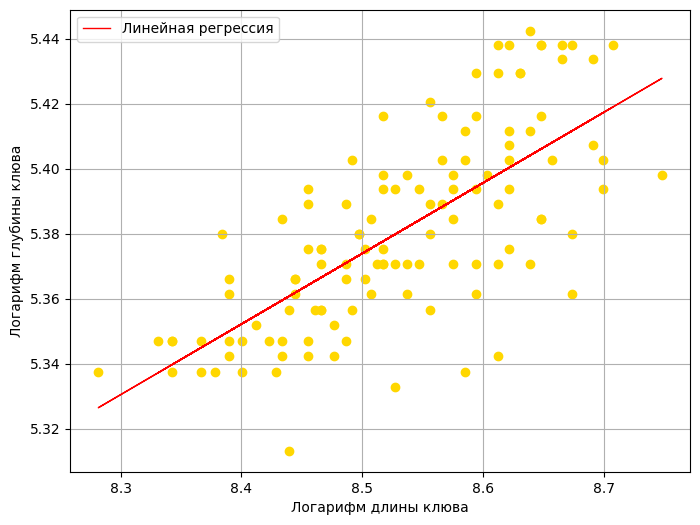

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='gold')  # Логарифмированные данные
plt.plot(X, predict_y, color='red', label='Линейная регрессия', linewidth=1, markersize=10)  # Линейная регрессия
plt.legend()
plt.grid()
plt.xlabel('Логарифм длины клюва')
plt.ylabel('Логарифм глубины клюва')
plt.show()

In [ ]:
# # понять какой именно столбик надо вставить
# Y_model = Linear_regration_Multi_dimensional([data[3]], res.x)
# print("A_mean : ", Mean_error_of_approximation(data[2], Y_model))
# print("R2 adj : ", Determination_coef_adj(data[2], Y_model, len(Y_model), len(res.x)))

# plt.title("Lin reg of ln('price') from ln('area'):")
# plt.ylabel(" ln('" + header[1]+ "') ")
# plt.xlabel(" ln('" + header[2]+ "') ")
# plt.plot(data[1], data[2] , "*", data[1], Y_model , "--")
# plt.show()


### Проведем анализ взаимосвязи между длиной клюва и глубиной клюва пингвина (меньше всего коррелируют данные)


In [ ]:
#Строим линейную регрессию для длинs клюва и глубинs клюва
X_nl = gentoo['dlina_kluva'].values.reshape(-1,1)
y_nl = gentoo['glubina_kluva'].values

model_nl = LinearRegression()
model_nl.fit(X_nl, y_nl)

y_predict_nl = model_nl.predict(X_nl)
print('Предсказанный y1: ', y_predict_nl )


Предсказанный y1:  [14.69185086 15.50153612 15.23164103 15.50153612 15.00326827 14.77489551
 14.54652274 14.81641783 14.11053837 14.83717899 13.61227053 15.29392451
 14.5672839  15.16935755 14.62956738 15.356208   13.84064329 15.33544684
 14.71261202 15.23164103 15.54305844 14.48423926 14.77489551 14.73337319
 14.02749373 14.69185086 15.04479059 15.12783523 15.50153612 14.94098479
 14.00673257 14.48423926 17.49460751 15.31468567 15.16935755 13.96521025
 14.33891114 14.2558665  15.23164103 13.98597141 15.41849148 14.52576158
 15.41849148 15.60534192 14.17282186 14.5672839  15.60534192 14.44271694
 14.50500042 14.79565667 15.19011871 14.48423926 15.52229728 14.77489551
 14.4634781  14.21434418 14.5672839  14.08977721 15.58458076 14.52576158
 14.71261202 14.60880622 16.39426601 14.62956738 15.4600138  15.39773032
 14.1520607  15.64686424 15.02402943 14.75413435 15.12783523 14.77489551
 14.75413435 15.21087987 14.98250711 15.72990888 14.50500042 14.50500042
 15.31468567 16.02056513 14.9617

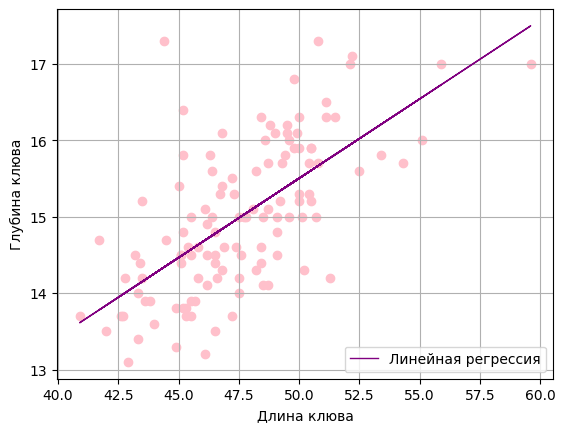

In [ ]:
plt.scatter(X_nl, y_nl, color = 'pink')
plt.plot(X_nl, y_predict_nl, color = 'purple', label = 'Линейная регрессия', linewidth=1, markersize=10)
plt.legend()
plt.grid()
plt.xlabel('Длина клюва')
plt.ylabel('Глубина клюва')
plt.show()

In [ ]:
# Рассчитаем множественную корреляцию
a = gentoo['dlina_kluva']
b = gentoo['glubina_kluva']

corr_coef = np.corrcoef(a,b)
mult_corr = corr_coef[-1: 1]
mult_corr = np.sqrt(np.prod(mult_corr**2))

print('Множественная корреляция: ', mult_corr)

Множественная корреляция:  1.0


In [ ]:
#Вычислим коэффициенты b1 и b0 для уравнения линейной регрессии:
x1 = gentoo['dlina_kluva']
y1 = gentoo['glubina_kluva']

mean_x = sum(x1)/len(x1)
mean_y = sum(y1)/len(y1)

covariance = sum((xi-mean_x)*(yi-mean_y) for xi, yi in zip(x1, y1))
variance = sum((xi - mean_x)**2 for xi in x1)

b1 = covariance / variance
b0 = mean_y - b1*mean_x

print('Коэффициент линейной регрессии: ')
print('b1 - наклон линии: ', b1)
print('b0 - интерсепт', b0)
print('Уравнение линейной регрессии: y = {:.2f} + {:.4f}*x1'.format(b0, b1))

#Обратная связь между зависимой переменной (y) и независимой переменной (x), увеличение x связано с уменьшением значения  y

Коэффициент линейной регрессии: 
b1 - наклон линии:  0.20761160342252527
b0 - интерсепт 5.120955946776917
Уравнение линейной регрессии: y = 5.12 + 0.2076*x1


In [ ]:
#Рассчитаем объясненную и необъясненную дисперсию
x2 = np.array(gentoo['dlina_kluva'])
y2 = np.array(gentoo['glubina_kluva'])

y_pred = b0 + b1*x1

y_mean = np.mean(y2)

#Объясненная дисперсия SSR(регресионный анализ)
SSR = np.sum((y_pred - y_mean)**2)

#Необъясненная дисперсия SSE(ошибка суммы квадратов)
SSE = np.sum((y2 - y_pred)**2)

sum_desp = int(SSR)+ int(SSE)

print('Объясненная дисперсия: ', SSR)
print('Необъясненная дисперсия: ', SSE )
print('Сумма: ', sum_desp)

Объясненная дисперсия:  49.07050285529154
Необъясненная дисперсия:  65.6481526068934
Сумма:  114


In [ ]:
#Коэффициент детерминации
r_2 = SSR / sum_desp
print('Коэффициент детерминации: ', r_2)

Коэффициент детерминации:  0.4304430075025573


In [ ]:
X1 = pgns['dlina_kluva'].values.reshape(-1,1)
y1 = pgns['glubina_kluva'].values
model1 = LinearRegression()
model1.fit(X1,y1)

predict1_y = model1.predict(X1)

print('Предсказанный y1: ', predict1_y)